# 알파벳 찾기
- source : [백준 14888](https://www.acmicpc.net/problem/14888)
- 난이도 : 실버 I
- 분류 : 브루트포스 알고리즘, 백트래킹 

## 문제
- N개의 수로 이루어진 수열 A1, A2, ..., AN이 주어진다. 또, 수와 수 사이에 끼워넣을 수 있는 N-1개의 연산자가 주어진다. 연산자는 덧셈(+), 뺄셈(-), 곱셈(×), 나눗셈(÷)으로만 이루어져 있다.

- 우리는 수와 수 사이에 연산자를 하나씩 넣어서, 수식을 하나 만들 수 있다. 이때, 주어진 수의 순서를 바꾸면 안 된다.

- 예를 들어, 6개의 수로 이루어진 수열이 1, 2, 3, 4, 5, 6이고, 주어진 연산자가 덧셈(+) 2개, 뺄셈(-) 1개, 곱셈(×) 1개, 나눗셈(÷) 1개인 경우에는 총 60가지의 식을 만들 수 있다. 예를 들어, 아래와 같은 식을 만들 수 있다.

```
1+2+3-4×5÷6
1÷2+3+4-5×6
1+2÷3×4-5+6
1÷2×3-4+5+6
```

- 식의 계산은 연산자 우선 순위를 무시하고 앞에서부터 진행해야 한다. 또, 나눗셈은 정수 나눗셈으로 몫만 취한다. 음수를 양수로 나눌 때는 C++14의 기준을 따른다. 즉, 양수로 바꾼 뒤 몫을 취하고, 그 몫을 음수로 바꾼 것과 같다. 이에 따라서, 위의 식 4개의 결과를 계산해보면 아래와 같다.

```
1+2+3-4×5÷6 = 1
1÷2+3+4-5×6 = 12
1+2÷3×4-5+6 = 5
1÷2×3-4+5+6 = 7
```

- N개의 수와 N-1개의 연산자가 주어졌을 때, 만들 수 있는 식의 결과가 최대인 것과 최소인 것을 구하는 프로그램을 작성하시오.
    
## 입력
- 첫째 줄에 수의 개수 N(2 ≤ N ≤ 11)가 주어진다. 둘째 줄에는 A1, A2, ..., AN이 주어진다. (1 ≤ Ai ≤ 100) 셋째 줄에는 합이 N-1인 4개의 정수가 주어지는데, 차례대로 덧셈(+)의 개수, 뺄셈(-)의 개수, 곱셈(×)의 개수, 나눗셈(÷)의 개수이다. 

## 출력
- 첫째 줄에 만들 수 있는 식의 결과의 최댓값을, 둘째 줄에는 최솟값을 출력한다. 연산자를 어떻게 끼워넣어도 항상 -10억보다 크거나 같고, 10억보다 작거나 같은 결과가 나오는 입력만 주어진다. 또한, 앞에서부터 계산했을 때, 중간에 계산되는 식의 결과도 항상 -10억보다 크거나 같고, 10억보다 작거나 같다.

규칙 정리
1. 주어진 수의 순서를 바꿀 수 없다.
2. 사칙연산 연산자를 사용한다.
3. 연산 우선순위는 무시하고 순차적으로 연산한다.
4. 나눗셈은 정수 나눗셈으로 몫만 취한다.
5. 음수를 양수로 나눌 때는 양수로 바꾼 뒤 몫을 취하고 몫을 음수로 바꾼다.
6. 만들 수 있는 결과의 최대값과 최소값을 구한다.

## 두 가지 풀이법
1. 순열 이용 (permutation library)
    - pypy에서 통과
2. dfs 이용 
    - 효율이 좋고 시간초과가 안나는 모범답안

In [29]:
## dfs 알고리즘 복습 
'''
dfs란?
- Depth First Search 
- 깊이 우선 탐색 

탐색 원칙 
1. 앞으로 찾아가야할 노드
2. 이미 방문한 노드

풀이 방법
1. 스택/큐 활용 가능
2. 재귀 활용 가능 
'''

graph = dict()

graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['D'] = ['B', 'E', 'F']
graph['E'] = ['D']
graph['F'] = ['D']
graph['C'] = ['A', 'G', 'H', 'I']
graph['G'] = ['C']
graph['H'] = ['C']
graph['I'] = ['C', 'J']
graph['J'] = ['I']

print(graph)

{'A': ['B', 'C'], 'B': ['A', 'D'], 'D': ['B', 'E', 'F'], 'E': ['D'], 'F': ['D'], 'C': ['A', 'G', 'H', 'I'], 'G': ['C'], 'H': ['C'], 'I': ['C', 'J'], 'J': ['I']}


In [28]:
# 큐 활용 
def dfs(graph, start_node):
    from collections import deque
    visited = []  # 이미 방문한 노드를 담는 리스트 
    need_visited = deque() # 앞으로 찾아가야할 노드를 담는 큐 
    need_visited.append(start_node)
    
    while need_visited: # 큐가 빌 때까지 반복
        n = need_visited.pop() # 오른쪽 원소 Pop
        
        if n not in visited:
            visited.append(n)
            need_visited.extend(graph[n])
            
    return visited

dfs(graph, 'A')

['A', 'C', 'I', 'J', 'H', 'G', 'B', 'D', 'F', 'E']

In [30]:
# 재귀 활용 

def dfs_recur(graph, start_node, visited=[]):
    visited.append(start_node)
    
    for node in graph[start_node]:
        if node not in visited:
            dfs_recur(graph, node, visited)
    return visited
    
dfs_recur(graph, 'A')

['A', 'B', 'D', 'E', 'F', 'C', 'G', 'H', 'I', 'J']

### 큐와 재귀를 사용한 bfs의 차이점
재귀는 왼쪽부터, 큐는 오른쪽부터 탐색한다. 

In [31]:
maxn = -int(1e9)
print(maxn)

-1000000000


In [3]:
n = 2
number = [5, 6]
op = [0, 0, 1, 0]
minR = int(1e9)
maxR = -int(1e9)

answer = number[0]

def dfs(idx):
    global answer
    global minR, maxR
    
    if idx == n:          # 전체 수열을 다 돌았을 때 
        if answer > maxR:
            maxR = answer
        if answer < minR:
            minR = answer
        return
    
    for i in range(4):
        tmp = answer
        if op[i] > 0:
            if i == 0:   # + 연산 
                answer += number[idx]
            elif i == 1: # - 연산
                answer -= number[idx]
            elif i == 2: # * 연산
                answer *= number[idx]
            else:        # // 연산, 음수일 때 계산법이 다르니 주의 
                if answer > 0 :
                    answer //= number[idx]
                else:
                    answer = (-(answer)//number[idx]) * -1
            
            op[i] -= 1
            dfs(idx+1) # 계산한 숫자를 저장한 채로 dfs 에 넣기
            answer = tmp # 다시 기존 값으로 돌아가기 (백트래킹)
            op[i] += 1   # 다시 기존 값으로 돌아가기 (백트래킹)

dfs(1)
print(maxR)
print(minR)

30
30


In [4]:
n = 2
number = [5, 6]
op = [0, 0, 1, 0]
minR = int(1e9)
maxR = -int(1e9)

answer = number[0]

def dfs(idx):
    global answer
    global minR, maxR
    
    if idx == n:
        if answer > maxR:
            maxR = answer
        if answer < minR:
            minR = answer
    
    for i in range(4):
        tmp = answer
        if op[i] > 0:
            if i == 0:
                answer += number[idx]
            
            elif i == 1:
                answer -= number[idx]
            
            elif i == 2:
                answer *= number[idx]
            
            else:
                answer = (-answer // number[idx]) * -1
            
            op[i] -= 1
            dfs(idx+1)
            answer = tmp 
            op[i] += 1

dfs(1)
print(maxR)
print(minR)

30
30


수열 = 3, 4, 5    
연산자 = 1, 0, 1, 0   

- dfs(1)
    - for 0 
    - ans = 3+4 = 7
    - op = 0, 0, 1, 0  // 재귀 : dfs(1+1) 
    - dfs(2)
        - ans = 7*5 = 35 
        - op = 0, 0, 0, 0 // recur : dfs(2+1)
        - dfs(3)
            - return : maxR, minR = 35
    - backtracking // ans = 3, op = 1, 0, 1, 0 
    - for 2
    - ans = 3*4 = 12
    - op = 1, 0, 0, 0 // recur : dfs(1+1)
    - dfs(2) 
        - ans = 12+5 = 17
        - ops = 0, 0, 0, 0 // recur : dfs(2+1)
        - dfs(3)
            - return : maxR = 35, minR = 17 
    - backtracking // ans = 3, op = 1, 0, 1, 0

In [6]:
n = 2
number = [5, 6]
op = [0, 0, 1, 0]
minR = int(1e9)
maxR = -int(1e9)

answer = number[0]

def dfs(idx):
    global answer
    global minR, maxR
    if idx == n:
        if answer > maxR:
            maxR = answer
        if answer < minR:
            minR = answer
    
    for i in range(4):
        tmp = answer
        if op[i] > 0:
            if i == 0: # plus
                answer += number[idx]
            elif i == 1: # minus
                answer -= number[idx]
            elif i == 2: # multiple
                answer *= number[idx]
            else: # divide
                answer = (-answer//number[idx]) * -1
            
            op[i] -= 1
            dfs(idx+1)
            op[i] += 1
            answer = tmp 

dfs(1)
print(maxR)
print(minR)

30
30


In [4]:
# 연산 단계별 dfs
# 백트래킹 

N = 3  # 수의 개수
seq = [3, 4, 5]  # 수열 
ops = [1, 0, 1, 0] # +, - , * , // 의 개수

maxR = -1e9  # max range
minR = 1e9   # min range



def dfs(depth, answer, plus, minus, multiple, divide):
#     global answer
    global maxR, minR
    
    if depth == N: # 전체 수열을 다 돌았을 때
        if answer > maxR:
            maxR = answer
        if answer < minR:
            minR = answer
    
    if plus:
        dfs(depth+1, answer+seq[depth], plus-1, minus, multiple, divide)
        
    if minus:
        dfs(depth+1, answer-seq[depth], plus, minus-1, multiple, divide)
        
    if multiple:
        dfs(depth+1, answer*seq[depth], plus, minus, multiple-1, divide)
        
    if divide:
        dfs(depth+1, -((-answer)//seq[depth]), plus, minus, multiple, divide-1)
        
    

dfs(1, seq[0], ops[0], ops[1], ops[2], ops[3])
print(maxR)
print(minR)

35
17


In [11]:
# 연산 단계별 dfs
# 백트래킹 

N = 6  # 수의 개수
seq = [1, 2, 3, 4, 5, 6]  # 수열 
ops = [2,1,1,1] # +, - , * , // 의 개수

maxR = -1e9  # max range
minR = 1e9   # min range



def dfs(depth, answer, plus, minus, multiple, divide):
#     global answer
    global maxR, minR
    
    if depth == N: # 전체 수열을 다 돌았을 때
        if answer > maxR:
            maxR = answer
        if answer < minR:
            minR = answer
    
    if plus:
        dfs(depth+1, answer+seq[depth], plus-1, minus, multiple, divide)
        
    if minus:
        dfs(depth+1, answer-seq[depth], plus, minus-1, multiple, divide)
        
    if multiple:
        dfs(depth+1, answer*seq[depth], plus, minus, multiple-1, divide)
        
    if divide:
        dfs(depth+1, int(answer/seq[depth]), plus, minus, multiple, divide-1)
        
    

dfs(1, seq[0], ops[0], ops[1], ops[2], ops[3])
print(maxR)
print(minR)

54
-24


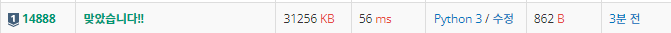